# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd #used for data processing and analysis

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

# H0 (answer in words)
H0:Low levels of masculinity in male characters do not have a significant effect on fanfiction success when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


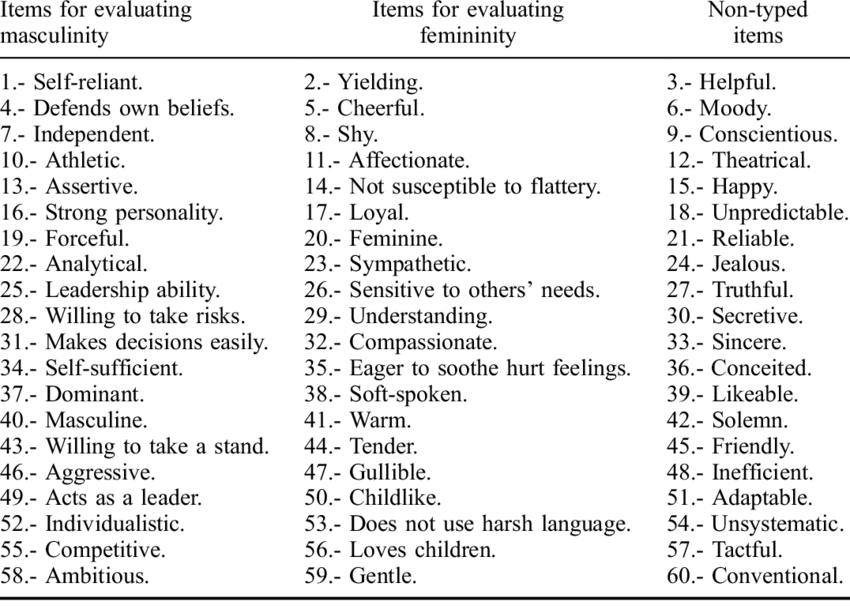

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [5]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab
! git clone https://github.com/maartensap/riveter-nlp.git
%cd /riveter-nlp/riveter
!pip install -U spacy-experimental
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf
!python -m spacy download en_core_web_sm
!pip install seaborn

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.
[Errno 2] No such file or directory: '/riveter-nlp/riveter'
/Users/margotwu/Desktop/riveter-nlp-main/riveter/A2_Analysing_Data/riveter-nlp/riveter/A2/riveter-nlp/riveter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 2.6 MB/s eta 0:00:0000:0100:04


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.1 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Now we have prepared all the dependencies needed.

In [6]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [7]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [8]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'

# Load lexicon 'power'
riveter = Riveter()
riveter.load_sap_lexicon('power')

# Create an empty dictionary called 'scores_dict'
scores_dict = {}


Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [9]:
from tqdm import tqdm # used to display a progress bar when executing code
import pandas as pd #used for data processing and analysis


    
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    # Define patterns for male pronouns
    riveter.train(segments, text_ids, num_bootstraps=20, persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|▎                       | 1/90 [00:04<07:01,  4.74s/it]

2024-03-14 21:56:49 Complete!
Story ID: 4706144, Masculine Power Score: 0.08355096053371916



Processing stories:   2%|▌                       | 2/90 [00:08<06:18,  4.30s/it]

2024-03-14 21:56:53 Complete!
Story ID: 4752980, Masculine Power Score: 0.28371535094428946



Processing stories:   3%|▊                       | 3/90 [00:12<05:45,  3.97s/it]

2024-03-14 21:56:57 Complete!
Story ID: 4621698, Masculine Power Score: 0.5790476190476189



Processing stories:   4%|█                       | 4/90 [00:16<05:40,  3.96s/it]

2024-03-14 21:57:01 Complete!
Story ID: 3651108, Masculine Power Score: 0.14967386636024743



Processing stories:   6%|█▎                      | 5/90 [00:20<05:44,  4.05s/it]

2024-03-14 21:57:05 Complete!
Story ID: 5282729, Masculine Power Score: 0.21649999001050896



Processing stories:   7%|█▌                      | 6/90 [00:24<05:41,  4.07s/it]

2024-03-14 21:57:09 Complete!
Story ID: 5533886, Masculine Power Score: 0.0011937830687830686



Processing stories:   8%|█▊                      | 7/90 [00:28<05:44,  4.16s/it]

2024-03-14 21:57:13 Complete!
Story ID: 4547622, Masculine Power Score: 0.06277637639288496



Processing stories:   9%|██▏                     | 8/90 [00:32<05:28,  4.00s/it]

2024-03-14 21:57:17 Complete!
Story ID: 16177508, Masculine Power Score: 0.14820220464022515



Processing stories:  10%|██▍                     | 9/90 [00:36<05:22,  3.98s/it]

2024-03-14 21:57:21 Complete!
Story ID: 15745185, Masculine Power Score: -0.12030926978341602



 33%|███████████████                              | 1/3 [00:01<00:03,  1.97s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|██▌                    | 10/90 [00:40<05:22,  4.03s/it]

2024-03-14 21:57:25 Complete!
Story ID: 15654528, Masculine Power Score: 0.20738397119457427



Processing stories:  12%|██▊                    | 11/90 [00:44<05:19,  4.04s/it]

2024-03-14 21:57:29 Complete!
Story ID: 7448155, Masculine Power Score: 0.31086370778798533



Processing stories:  13%|███                    | 12/90 [00:49<05:24,  4.16s/it]

2024-03-14 21:57:33 Complete!
Story ID: 4983847, Masculine Power Score: 0.12374633297173865



Processing stories:  14%|███▎                   | 13/90 [00:53<05:23,  4.20s/it]

2024-03-14 21:57:38 Complete!
Story ID: 3313118, Masculine Power Score: -0.23804583098061358



Processing stories:  16%|███▌                   | 14/90 [00:57<05:18,  4.20s/it]

2024-03-14 21:57:42 Complete!
Story ID: 3290390, Masculine Power Score: -0.10517729757403274



Processing stories:  17%|███▊                   | 15/90 [01:02<05:30,  4.41s/it]

2024-03-14 21:57:47 Complete!
Story ID: 36435301, Masculine Power Score: 0.06205192366183078



Processing stories:  18%|████                   | 16/90 [01:06<05:24,  4.39s/it]

2024-03-14 21:57:51 Complete!
Story ID: 36575491, Masculine Power Score: 0.26288693010080094



Processing stories:  19%|████▎                  | 17/90 [01:11<05:17,  4.35s/it]

2024-03-14 21:57:55 Complete!
Story ID: 35225224, Masculine Power Score: 0.23512175567802168



Processing stories:  20%|████▌                  | 18/90 [01:15<05:13,  4.35s/it]

2024-03-14 21:58:00 Complete!
Story ID: 4594527, Masculine Power Score: 0.17633019758019758



Processing stories:  21%|████▊                  | 19/90 [01:19<04:59,  4.21s/it]

2024-03-14 21:58:04 Complete!
Story ID: 5485625, Masculine Power Score: 0.10681697612732093



Processing stories:  22%|█████                  | 20/90 [01:23<04:52,  4.18s/it]

2024-03-14 21:58:08 Complete!
Story ID: 36408319, Masculine Power Score: 0.15835700362016153



Processing stories:  23%|█████▎                 | 21/90 [01:28<05:04,  4.41s/it]

2024-03-14 21:58:13 Complete!
Story ID: 35762659, Masculine Power Score: 0.20321874926245687



Processing stories:  24%|█████▌                 | 22/90 [01:33<05:08,  4.54s/it]

2024-03-14 21:58:18 Complete!
Story ID: 35603194, Masculine Power Score: 0.3557908180412717



Processing stories:  26%|█████▉                 | 23/90 [01:37<05:04,  4.55s/it]

2024-03-14 21:58:22 Complete!
Story ID: 35344306, Masculine Power Score: 0.13139003123711687



Processing stories:  27%|██████▏                | 24/90 [01:41<04:47,  4.36s/it]

2024-03-14 21:58:26 Complete!
Story ID: 36695155, Masculine Power Score: 0.08833333333333335



Processing stories:  28%|██████▍                | 25/90 [01:46<04:48,  4.44s/it]

2024-03-14 21:58:31 Complete!
Story ID: 36064474, Masculine Power Score: 0.10714284061382225



Processing stories:  29%|██████▋                | 26/90 [01:51<04:49,  4.52s/it]

2024-03-14 21:58:35 Complete!
Story ID: 36024820, Masculine Power Score: 0.1388114507652311



Processing stories:  30%|██████▉                | 27/90 [01:56<05:00,  4.76s/it]

2024-03-14 21:58:41 Complete!
Story ID: 35182330, Masculine Power Score: 0.06121769832557037



Processing stories:  31%|███████▏               | 28/90 [02:01<05:01,  4.86s/it]

2024-03-14 21:58:46 Complete!
Story ID: 36567496, Masculine Power Score: 0.20488805626865134



Processing stories:  32%|███████▍               | 29/90 [02:06<04:56,  4.87s/it]

2024-03-14 21:58:51 Complete!
Story ID: 35560330, Masculine Power Score: 0.10348955437833965



Processing stories:  33%|███████▋               | 30/90 [02:11<04:57,  4.96s/it]

2024-03-14 21:58:56 Complete!
Story ID: 35877496, Masculine Power Score: 0.08367932532491859



Processing stories:  34%|███████▉               | 31/90 [02:16<04:49,  4.91s/it]

2024-03-14 21:59:01 Complete!
Story ID: 35957410, Masculine Power Score: 0.2870151951061215



Processing stories:  36%|████████▏              | 32/90 [02:21<04:41,  4.85s/it]

2024-03-14 21:59:05 Complete!
Story ID: 30947654, Masculine Power Score: 0.04074736409990494



Processing stories:  37%|████████▍              | 33/90 [02:26<04:39,  4.91s/it]

2024-03-14 21:59:10 Complete!
Story ID: 36332707, Masculine Power Score: -0.10092423598436548



Processing stories:  38%|████████▋              | 34/90 [02:31<04:43,  5.06s/it]

2024-03-14 21:59:16 Complete!
Story ID: 35967940, Masculine Power Score: 0.16741824685509732



Processing stories:  39%|████████▉              | 35/90 [02:36<04:42,  5.14s/it]

2024-03-14 21:59:21 Complete!
Story ID: 35001073, Masculine Power Score: 0.2817099567099567



Processing stories:  40%|█████████▏             | 36/90 [02:42<04:41,  5.22s/it]

2024-03-14 21:59:27 Complete!
Story ID: 35138911, Masculine Power Score: 0.1334172496533962



Processing stories:  41%|█████████▍             | 37/90 [02:46<04:25,  5.00s/it]

2024-03-14 21:59:31 Complete!
Story ID: 35280397, Masculine Power Score: 0.2689041068580542



Processing stories:  42%|█████████▋             | 38/90 [02:52<04:29,  5.18s/it]

2024-03-14 21:59:37 Complete!
Story ID: 36049939, Masculine Power Score: 0.34879326979781905



Processing stories:  43%|█████████▉             | 39/90 [02:57<04:29,  5.29s/it]

2024-03-14 21:59:42 Complete!
Story ID: 34995673, Masculine Power Score: 0.14462594437546072



Processing stories:  44%|██████████▏            | 40/90 [03:03<04:33,  5.46s/it]

2024-03-14 21:59:48 Complete!
Story ID: 33477346, Masculine Power Score: 0.43292857877416696



Processing stories:  46%|██████████▍            | 41/90 [03:08<04:15,  5.22s/it]

2024-03-14 21:59:53 Complete!
Story ID: 36840832, Masculine Power Score: -0.2281971537234695



Processing stories:  47%|██████████▋            | 42/90 [03:12<03:58,  4.97s/it]

2024-03-14 21:59:57 Complete!
Story ID: 30896276, Masculine Power Score: -0.0015037593984962322



Processing stories:  48%|██████████▉            | 43/90 [03:17<03:45,  4.79s/it]

2024-03-14 22:00:01 Complete!
Story ID: 37363471, Masculine Power Score: 0.43057644110275695



Processing stories:  49%|███████████▏           | 44/90 [03:21<03:37,  4.73s/it]

2024-03-14 22:00:06 Complete!
Story ID: 36984901, Masculine Power Score: 0.11855026381880603



Processing stories:  50%|███████████▌           | 45/90 [03:26<03:33,  4.74s/it]

2024-03-14 22:00:11 Complete!
Story ID: 33353644, Masculine Power Score: -0.03900338655055636



Processing stories:  51%|███████████▊           | 46/90 [03:31<03:29,  4.75s/it]

2024-03-14 22:00:16 Complete!
Story ID: 37002835, Masculine Power Score: -0.14280605359552728



Processing stories:  52%|████████████           | 47/90 [03:35<03:22,  4.70s/it]

2024-03-14 22:00:20 Complete!
Story ID: 5630824, Masculine Power Score: 0.30701754385964913



Processing stories:  53%|████████████▎          | 48/90 [03:40<03:22,  4.82s/it]

2024-03-14 22:00:25 Complete!
Story ID: 10053617, Masculine Power Score: 0.24554173303991397



Processing stories:  54%|████████████▌          | 49/90 [03:45<03:16,  4.80s/it]

2024-03-14 22:00:30 Complete!
Story ID: 1572659, Masculine Power Score: 0.2504847970656794



Processing stories:  56%|████████████▊          | 50/90 [03:50<03:17,  4.94s/it]

2024-03-14 22:00:35 Complete!
Story ID: 7450573, Masculine Power Score: 0.3882530704589528



Processing stories:  57%|█████████████          | 51/90 [03:56<03:14,  4.98s/it]

2024-03-14 22:00:40 Complete!
Story ID: 6918676, Masculine Power Score: 0.042796673290578305



Processing stories:  58%|█████████████▎         | 52/90 [04:02<03:20,  5.27s/it]

2024-03-14 22:00:46 Complete!
Story ID: 6075402, Masculine Power Score: 0.3629921678143996



Processing stories:  59%|█████████████▌         | 53/90 [04:07<03:16,  5.32s/it]

2024-03-14 22:00:52 Complete!
Story ID: 11101779, Masculine Power Score: 0.3302655677655677



Processing stories:  60%|█████████████▊         | 54/90 [04:13<03:15,  5.42s/it]

2024-03-14 22:00:57 Complete!
Story ID: 11321331, Masculine Power Score: 0.07691763347182284



Processing stories:  61%|██████████████         | 55/90 [04:17<03:03,  5.24s/it]

2024-03-14 22:01:02 Complete!
Story ID: 12284853, Masculine Power Score: 0.1828560329058377



Processing stories:  62%|██████████████▎        | 56/90 [04:22<02:54,  5.14s/it]

2024-03-14 22:01:07 Complete!
Story ID: 12282003, Masculine Power Score: 0.12282013100455613



Processing stories:  63%|██████████████▌        | 57/90 [04:27<02:42,  4.94s/it]

2024-03-14 22:01:12 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████████████▊        | 58/90 [04:32<02:35,  4.87s/it]

2024-03-14 22:01:16 Complete!
Story ID: 4228053, Masculine Power Score: 0.21402481105556398



Processing stories:  66%|███████████████        | 59/90 [04:37<02:34,  4.98s/it]

2024-03-14 22:01:22 Complete!
Story ID: 12127317, Masculine Power Score: 0.13392855077913865



Processing stories:  67%|███████████████▎       | 60/90 [04:41<02:25,  4.84s/it]

2024-03-14 22:01:26 Complete!
Story ID: 12010134, Masculine Power Score: 0.1804342290275794



Processing stories:  68%|███████████████▌       | 61/90 [04:47<02:27,  5.09s/it]

2024-03-14 22:01:32 Complete!
Story ID: 11510919, Masculine Power Score: 0.42198869325354904



Processing stories:  69%|███████████████▊       | 62/90 [04:52<02:23,  5.12s/it]

2024-03-14 22:01:37 Complete!
Story ID: 8145802, Masculine Power Score: 0.2168786832286121



Processing stories:  70%|████████████████       | 63/90 [04:57<02:17,  5.09s/it]

2024-03-14 22:01:42 Complete!
Story ID: 6637942, Masculine Power Score: -0.15178842146126184



Processing stories:  71%|████████████████▎      | 64/90 [05:02<02:11,  5.07s/it]

2024-03-14 22:01:47 Complete!
Story ID: 7427905, Masculine Power Score: -0.034084599305187535



Processing stories:  72%|████████████████▌      | 65/90 [05:07<02:06,  5.05s/it]

2024-03-14 22:01:52 Complete!
Story ID: 3893857, Masculine Power Score: 0.14067789623105714



Processing stories:  73%|████████████████▊      | 66/90 [05:12<02:00,  5.01s/it]

2024-03-14 22:01:57 Complete!
Story ID: 33040258, Masculine Power Score: 0.14452798663324978



Processing stories:  74%|█████████████████      | 67/90 [05:18<01:58,  5.16s/it]

2024-03-14 22:02:02 Complete!
Story ID: 33858850, Masculine Power Score: -0.1528091357160935



Processing stories:  76%|█████████████████▍     | 68/90 [05:23<01:54,  5.21s/it]

2024-03-14 22:02:08 Complete!
Story ID: 2775776, Masculine Power Score: 0.24503690753690752



Processing stories:  77%|█████████████████▋     | 69/90 [05:28<01:49,  5.20s/it]

2024-03-14 22:02:13 Complete!
Story ID: 3197963, Masculine Power Score: 0.3291880341880342



Processing stories:  78%|█████████████████▉     | 70/90 [05:33<01:43,  5.17s/it]

2024-03-14 22:02:18 Complete!
Story ID: 12395199, Masculine Power Score: 0.151876950489153



Processing stories:  79%|██████████████████▏    | 71/90 [05:38<01:34,  4.98s/it]

2024-03-14 22:02:23 Complete!
Story ID: 10934010, Masculine Power Score: 0.27298941798941795



Processing stories:  80%|██████████████████▍    | 72/90 [05:42<01:27,  4.86s/it]

2024-03-14 22:02:27 Complete!
Story ID: 12301116, Masculine Power Score: 0.007887112561457223



Processing stories:  81%|██████████████████▋    | 73/90 [05:47<01:23,  4.91s/it]

2024-03-14 22:02:32 Complete!
Story ID: 12706317, Masculine Power Score: -0.09942012383654215



Processing stories:  82%|██████████████████▉    | 74/90 [05:53<01:21,  5.10s/it]

2024-03-14 22:02:38 Complete!
Story ID: 11499468, Masculine Power Score: -0.04607973629807998



Processing stories:  83%|███████████████████▏   | 75/90 [05:58<01:14,  4.95s/it]

2024-03-14 22:02:42 Complete!
Story ID: 12184146, Masculine Power Score: 0.36775355054302417



Processing stories:  84%|███████████████████▍   | 76/90 [06:02<01:08,  4.87s/it]

2024-03-14 22:02:47 Complete!
Story ID: 12201333, Masculine Power Score: 0.13335207929325574



Processing stories:  86%|███████████████████▋   | 77/90 [06:08<01:06,  5.12s/it]

2024-03-14 22:02:53 Complete!
Story ID: 11496030, Masculine Power Score: 0.01688631124524327



Processing stories:  87%|███████████████████▉   | 78/90 [06:13<01:01,  5.13s/it]

2024-03-14 22:02:58 Complete!
Story ID: 11510277, Masculine Power Score: 0.18426099600793433



Processing stories:  88%|████████████████████▏  | 79/90 [06:19<00:58,  5.28s/it]

2024-03-14 22:03:03 Complete!
Story ID: 10772274, Masculine Power Score: 0.4396423519141107



Processing stories:  89%|████████████████████▍  | 80/90 [06:24<00:53,  5.36s/it]

2024-03-14 22:03:09 Complete!
Story ID: 12646050, Masculine Power Score: 0.06347339307865624



Processing stories:  90%|████████████████████▋  | 81/90 [06:29<00:47,  5.24s/it]

2024-03-14 22:03:14 Complete!
Story ID: 11161479, Masculine Power Score: -0.022319428992244504



Processing stories:  91%|████████████████████▉  | 82/90 [06:34<00:41,  5.19s/it]

2024-03-14 22:03:19 Complete!
Story ID: 12069936, Masculine Power Score: 0.036744273811942986



Processing stories:  92%|█████████████████████▏ | 83/90 [06:40<00:36,  5.23s/it]

2024-03-14 22:03:24 Complete!
Story ID: 12285972, Masculine Power Score: 0.3475442116808197



Processing stories:  93%|█████████████████████▍ | 84/90 [06:46<00:32,  5.50s/it]

2024-03-14 22:03:30 Complete!
Story ID: 12372702, Masculine Power Score: -0.039000673472491316



Processing stories:  94%|█████████████████████▋ | 85/90 [06:52<00:28,  5.71s/it]

2024-03-14 22:03:37 Complete!
Story ID: 12610496, Masculine Power Score: 0.09143897065762044



Processing stories:  96%|█████████████████████▉ | 86/90 [06:58<00:22,  5.71s/it]

2024-03-14 22:03:42 Complete!
Story ID: 10970472, Masculine Power Score: 0.09566498316498316



Processing stories:  97%|██████████████████████▏| 87/90 [07:03<00:16,  5.58s/it]

2024-03-14 22:03:48 Complete!
Story ID: 12084552, Masculine Power Score: 0.3517310687670799



Processing stories:  98%|██████████████████████▍| 88/90 [07:09<00:11,  5.81s/it]

2024-03-14 22:03:54 Complete!
Story ID: 12727119, Masculine Power Score: 0.019143799466492372



Processing stories:  99%|██████████████████████▋| 89/90 [07:15<00:05,  5.66s/it]

2024-03-14 22:03:59 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|███████████████████████| 90/90 [07:20<00:00,  4.89s/it]

2024-03-14 22:04:05 Complete!
Story ID: 10859508, Masculine Power Score: 0.2601576306238072


Now, we have assigned scores to each text based on male pronouns in each text.

**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [10]:
# Q2 (code)
print(df.head())

   story_id  published_year  words  kudos  comments  \
0   4706144            2015   1185  249.0       1.0   
1   4752980            2015   1164   79.0       NaN   
3   4621698            2015   1016  105.0       4.0   
5   3651108            2015   1174  339.0       6.0   
7   5282729            2015   1173   17.0       NaN   

                                       story_content  masculine_power_score  
0  library snacks & 3AM promises\n\nAuthor's Note...               0.083551  
1  Worry\n\nYou stumbled through the apartment do...               0.283715  
3  Mornings\n\nThis is literally trash omg what I...               0.579048  
5  Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...               0.149674  
7  Unspoken Words\n\nYou come back into the flat,...               0.216500  


##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [11]:
!pip install lexicalrichness

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [12]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.083551,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.283715,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.579048,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.149674,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.216500,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


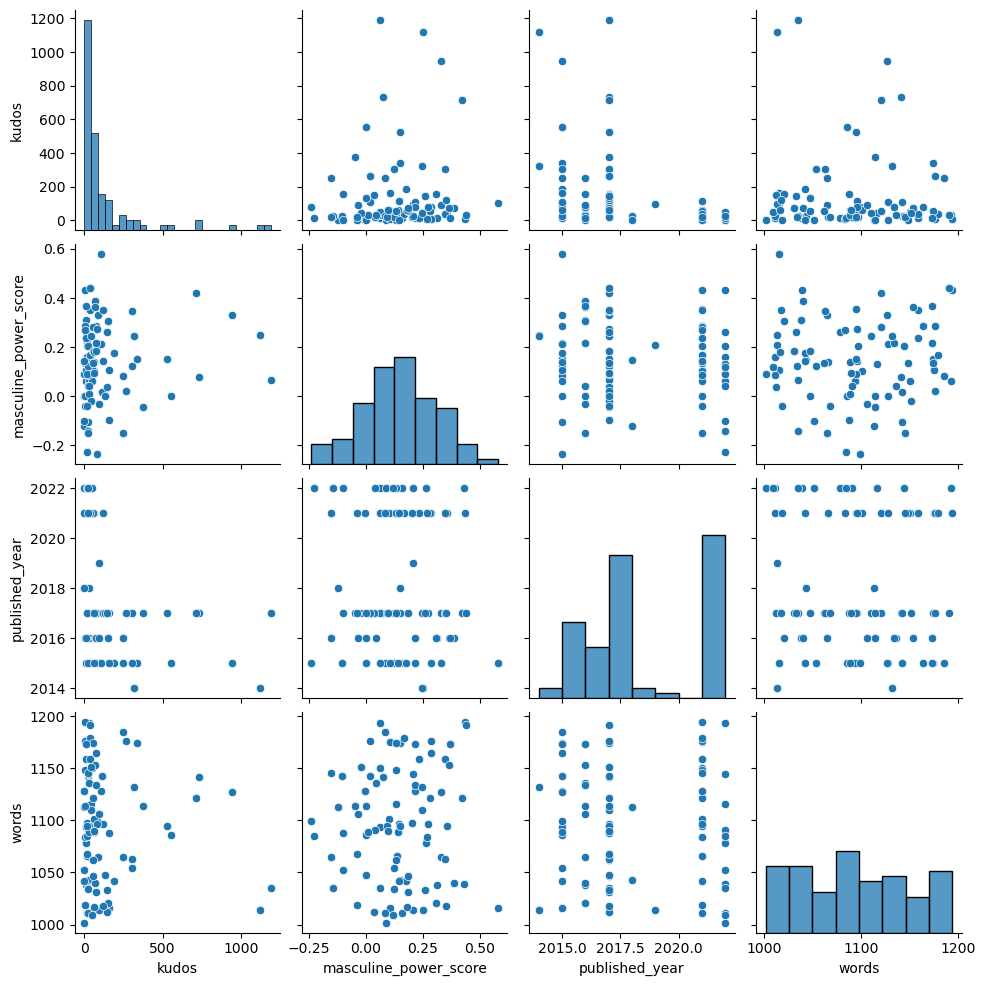

In [13]:
# Q3a (code): Check data distribution
import seaborn as sns # used for
import matplotlib.pyplot as plt #used for

# Check data distribution of the variables
sns.pairplot(df[['kudos', 'masculine_power_score', 'published_year', 'words']])
plt.show()


The plot depicts the distribution of four variables: kudos (number of appreciations), masculine_power_score (potentially a measure of some masculine power characteristic), published_year (publication year), and words (word count):

1. Kudos:
   - Concentrated primarily in lower appreciation counts, indicating a right-skewed distribution.
   - Few instances of high appreciation counts, suggesting that only a few works receive a large number of appreciations.
   - Appears to lack a clear linear relationship with other variables.

2. Masculine_power_score:
   - The distribution appears to be multimodal, with several distinct peaks.
   - This may indicate the presence of multiple groups or categories, each with its specific range of masculine power scores.
   - No discernible trend suggests an association with kudos, published year, or word count.

3. Published_year:
   - The data is concentrated in specific years, possibly representing several time points during data collection.
   - Insufficient information to infer trends, but an observation of more publications in certain years.

4. Words:
   - Word count varies within a certain range, displaying a right-skewed distribution.
   - Similar to kudos, most works have a relatively low word count, with only a few having a significantly higher word count.
   - No clear association observed between word count and kudos.

Upon analysis of the scatter plots, no apparent linear relationships or distinct patterns were observed, suggesting that the relationships between these variables may either be nonlinear, weak, or non-existent altogether. Further investigation into these relationships may require statistical testing or the use of more sophisticated models to explore potential associations.

In [14]:
# Q3b (code): compute some descriptive statistics
# Compute descriptive statistics
descriptive_stats = df.describe()

# Print the descriptive statistics
print(descriptive_stats)


           story_id  published_year        words        kudos   comments  \
count  9.000000e+01       90.000000    90.000000    89.000000  65.000000   
mean   1.839576e+07     2018.088889  1094.344444   135.393258   6.923077   
std    1.307922e+07        2.612177    55.327048   229.972311   7.005149   
min    1.572659e+06     2014.000000  1002.000000     1.000000   1.000000   
25%    7.448760e+06     2016.000000  1042.250000    20.000000   2.000000   
50%    1.224167e+07     2017.000000  1095.000000    54.000000   5.000000   
75%    3.517148e+07     2021.000000  1141.750000   122.000000   9.000000   
max    3.736347e+07     2022.000000  1194.000000  1190.000000  36.000000   

       masculine_power_score  lexical_richness  
count              90.000000         90.000000  
mean                0.143962          0.405027  
std                 0.162108          0.037109  
min                -0.238046          0.264443  
25%                 0.041260          0.384458  
50%                 0

Based on the results, we can identify the following information.

Story Count and Year Distribution: The dataset comprises 90 stories distributed across different years, ranging from 2014 to 2022. On average, there are approximately 10 stories published per year. The relatively small standard deviation (about 2.61) in the publication years suggests a relatively concentrated distribution of data points along the timeline.

Story Length: The average length of the stories is around 1094 words, with a standard deviation of 55.33, indicating that most stories have similar lengths but with some variation. The shortest story consists of 1002 words, while the longest one contains 1194 words.

Kudos and Comments: There is a wide distribution of Kudos (likes) and comments received by the stories, indicating significant variability in popularity and engagement levels. The average number of Kudos is 135.39, but with a standard deviation of 229.97, indicating high dispersion in the data.

Masculine Power Score and Lexical Richness: The average masculine power score in the stories is approximately 0.144, with a standard deviation of 0.162, suggesting some variability in the portrayal of masculine power. The average lexical richness is around 0.405, with a standard deviation of 0.037, indicating relatively stable vocabulary richness across most stories but with some variation.

After that,further analysis could explore relationships between these variables, such as the correlation between Kudos and story length or masculine power score.

In [15]:
# Q3c (code): Check for any missing values
# Check for missing values
missing_values = df.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
kudos        1
comments    25
dtype: int64


In [16]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
# Replace NA values with zeros
df.fillna(0, inplace=True)

# Check for any missing values again
missing_values_after = df.isnull().sum()

# Print columns with missing values
print("Columns with missing values after replacing with zeros:")
print(missing_values_after[missing_values_after > 0])


Columns with missing values after replacing with zeros:
Series([], dtype: int64)


It is important to handle missing values because they can potentially introduce bias and reduce the accuracy of statistical analyses. Missing values can distort the relationships between variables and lead to incorrect conclusions. By addressing missing values appropriately, we can ensure the integrity and reliability of the data analysis process. Additionally, handling missing values allows us to maximize the utility of available data and minimize the impact of incomplete information on the study outcomes.

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

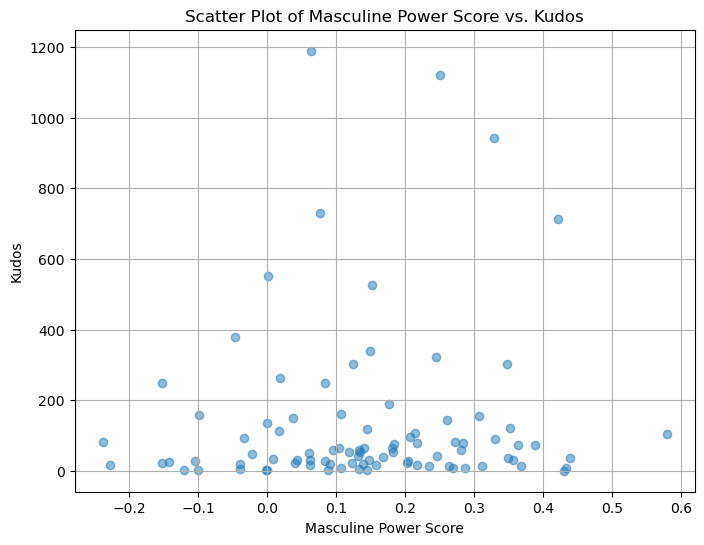

In [17]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['masculine_power_score'], df['kudos'], alpha=0.5)
plt.title('Scatter Plot of Masculine Power Score vs. Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.grid(True)
plt.show()

The scatter plot illustrates the relationship between "Masculine Power Score" and "Kudos." The following characteristics can be observed from the plot:


1. Distribution:

   Data points are more densely clustered towards the lower end of the "Masculine Power Score."
   There is a higher concentration of "Kudos" at lower scores, particularly in the region where appreciation counts are below 200.



2. Relationship:

   The scatter plot indicates no apparent linear relationship. Data points do not cluster around any straight line or curve, suggesting a lack of strong positive or negative correlation between "Masculine Power Score" and "Kudos."
   There are some outliers with higher "Kudos" counts, but they do not exhibit any specific trend with "Masculine Power Score."



3. Outliers:

   Several outliers with notably high "Kudos" counts imply that certain samples are exceptionally popular.   
   "Masculine Power Score" appears to have high appreciation counts across the entire range, but there is insufficient evidence to suggest this as a consistent pattern.
   
   


4. Density:

   Most data points for "Masculine Power Score" are concentrated around zero, indicating that the majority of the data's scores are close to neutral or average levels.
   There is greater point density at lower values of appreciation counts, suggesting that most data points have low counts of appreciation.
   
   



5. Trends:

   While there are no apparent trends in the plot, statistical analyses such as calculating correlation coefficients can be conducted to determine if there is any statistically significant correlation between these two variables.
   
   

Overall, the scatter plot suggests no direct relationship between "Masculine Power Score" and "Kudos." Despite some points with high "Kudos" values, there is no clear evidence of stable correlation with "Masculine Power Score."

**Q5. Multiple Regression and Analysis**

In [20]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary


import statsmodels.api as sm

# Define independent variables
X = df[['masculine_power_score', 'published_year', 'words']]

# Add constant to independent variables
X = sm.add_constant(X)

# Define dependent variable
y = df['kudos']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print regression result summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.607
Date:                Thu, 14 Mar 2024   Prob (F-statistic):            0.00147
Time:                        22:08:00   Log-Likelihood:                -608.25
No. Observations:                  90   AIC:                             1224.
Df Residuals:                      86   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.992e+

**Q6. Interpret the results of the regression analysis**

# Q6a (words): Interpret the R-squared and Adj. R-squared

The coefficients of determination, both R-squared and Adjusted R-squared, are essential metrics in evaluating the efficacy of regression models in elucidating the variance of dependent variables predicated upon independent variables.

R-squared delineates the fraction of the variance in the dependent variable, kudos, explicable by the independent variables, namely masculine_power_score, published_year, and words. In this analysis, the attained R-squared value stands at 0.164, implying that approximately 16.4% of the variation observed in kudos can be accounted for by the incorporated independent variables.

Moreover, Adjusted R-squared offers a refined perspective by considering the influence of the number of predictors in the model. It mitigates the potential inflation of explanatory power attributable to extraneous variables that do not substantially contribute to enhancing model precision. In the present study, the Adjusted R-squared value registers at 0.134, slightly lower than the R-squared. This diminution underscores the possibility that the model's explanatory capacity may be somewhat overstated, reflecting the inclusion of variables that fail to yield significant improvements in elucidating the variance observed in the dependent variable.

In summary, the juxtaposition of these coefficients provides comprehensive insights into the model's aptitude in explicating the variance of the dependent variable, thereby facilitating informed interpretations and decision-making processes in the analytical context.

# Q6b (words): Interpret F-test result
The F-test within the framework of Ordinary Least Squares (OLS) regression serves as a pivotal tool for gauging the collective significance of the model, juxtaposing the encompassing model with the sole intercept (constant) model. Specifically, it scrutinizes whether the inclusion of independent variables, such as masculine_power_score, published_year, and words, yields a superior fit compared to a model devoid of such predictors.

In the present analysis, the F-statistic attains a value of 5.607, accompanied by a corresponding probability (Prob) of 0.00147.

Additionally,the obtained p-value of 0.00147 signifies statistical significance, suggesting a robust relationship between the independent and dependent variables.
This outcome underscores the presence of at least one influential independent variable among masculine_power_score, published_year, and words, exerting a discernible impact on the dependent variable, kudos.

Consequently, we can confidently reject the null hypothesis positing that all coefficients within the model are null, thereby affirming the statistical significance of the regression model as a whole.
In summation, the F-test outcome furnishes compelling evidence substantiating the proposition that the regression model, inclusive of the aforementioned independent variables, substantially elucidates the variance inherent in the dependent variable. This assertion bears crucial implications for informed decision-making and analytical interpretations within the purview of the investigation.

# Q6c (words): Interpret coefficients and t-test result

In the framework of Ordinary Least Squares (OLS) regression, the interpretation of coefficients and associated t-tests constitutes a pivotal component in elucidating the individual contributions of independent variables (masculine_power_score, published_year, and words) to the dependent variable (kudos).

Coefficients:

- Coefficients serve as estimations of the magnitude of impact exerted by each independent variable on the dependent variable, holding all other variables constant.
- Within the present analysis:
  - The coefficient attributed to masculine_power_score stands at 58.0286.
  - The coefficient associated with published_year is -34.4133.
  - The coefficient corresponding to words is -0.3119.

T-tests:

- T-tests serve to ascertain the statistical significance of each coefficient, indicating whether the estimated effect significantly deviates from zero.
- The p-values linked with each coefficient furnish this critical information.
- Within the present analysis:  
  - Regarding masculine_power_score, the observed p-value of 0.679 indicates a lack of statistical significance at conventional significance thresholds (e.g., α = 0.05). Consequently, substantive evidence supporting a significant influence of masculine_power_score on kudos is deemed insufficient.
  - Conversely, both published_year and words manifest statistically significant coefficients, boasting p-values below the customary threshold of 0.05. This suggests a robust impact of these variables on kudos.
  - The negative coefficient associated with published_year (-34.4133) implies that, while controlling for other covariates, each unit escalation in published_year is linked with a decrement in kudos by approximately 34.4133 units.
  - Similarly, the negative coefficient pertaining to words (-0.3119) indicates that, under similar conditions, each additional word within the story_content correlates with a slight reduction in kudos by 0.3119 units.

In summary, while published_year and words emerge as robust predictors of kudos, the absence of statistical significance surrounding masculine_power_score precludes any inference regarding its impact. This nuanced comprehension of coefficients and their associated t-tests affords a comprehensive evaluation of the individual explanatory capacity of each independent variable within the regression model.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [21]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
import statsmodels.api as sm
from scipy.stats import shapiro

# Extracting independent variables
X = df[['masculine_power_score', 'published_year', 'words']]

# Adding constant term
X = sm.add_constant(X)

# Extracting dependent variable
y = df['kudos']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Shapiro-Wilk Test for Normality
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test:')
print(f'Statistics={stat}, p-value={p}')


Shapiro-Wilk Test:
Statistics=0.6955888271331787, p-value=2.2922067889619147e-12


# Q7b (words): Write your analysis for the Normality Test there:
The Shapiro-Wilk test was conducted to assess the normality of the dataset, aiming to determine whether the observed data significantly deviates from a normal distribution. The test resulted in a Shapiro-Wilk statistic of 0.6956 and a corresponding p-value of 2.29e-12.

Interpretation:

Test Statistic: The Shapiro-Wilk statistic measures how closely the dataset conforms to the shape of a normal distribution. Values closer to 1 indicate a stronger resemblance to normality. Here, the computed statistic of 0.6956 suggests a departure from the expected pattern of a normal distribution.

p-value: The p-value indicates the probability of observing the calculated test statistic under the assumption of a normal distribution. A lower p-value suggests stronger evidence against the assumption of normality. In this case, the extremely low p-value of 2.29e-12 indicates substantial evidence against the null hypothesis of normality.

Analysis:

The obtained p-value, well below the conventional significance level of 0.05, leads to the rejection of the null hypothesis, indicating a significant departure from the assumption of a normal distribution.

Consequently, it is important to recognize that the dataset may not follow the typical bell-shaped curve associated with a normal distribution. This departure from normality can impact the validity of statistical analyses that rely on this assumption, such as parametric tests like t-tests or ANOVA.



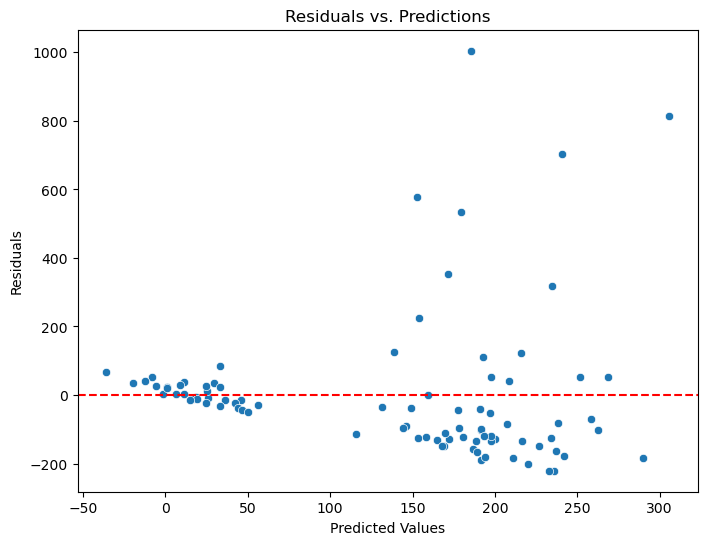

In [22]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = model.resid

# Plot residuals vs. predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.title('Residuals vs. Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

# Q7d (words): Write your analysis for the Homoscedasticity Test here:
Homoscedasticity denotes the uniformity of variance in the residuals across the range of predicted values. A constant spread of residuals around the horizontal axis indicates adherence to this assumption, ensuring the validity of regression analyses.

Upon scrutiny of the plot, the following observations are delineated regarding the homoscedasticity condition:

Spread of Residuals: The anticipated scenario entails residuals exhibiting random dispersion relative to the horizontal axis, indicative of uniform variance. However, discernible from the plot, a discernible pattern emerges whereby the spread of residuals progressively widens with escalating predicted values. This observable trend suggests potential heteroscedasticity, signifying a non-constant variance of residuals.

Manifestation of Patterns or Trends: Ideally, a scatterplot devoid of conspicuous patterns or trends is desirable. Nonetheless, a discernible funnel-shaped pattern emerges, depicting an augmentation in residual dispersion with increasing predicted values. This manifestation signifies an escalating variance in residuals concerning predicted values, thereby corroborating the presence of heteroscedasticity.

Identification of Outliers or Extreme Values: Notably, the presence of outliers, particularly notable for higher predicted values, is evident. These outliers, characterized by notably high residuals, possess the propensity to exert a pronounced influence on regression analyses and may serve as potential catalysts for heteroscedasticity.

**Q8: Multicollinearity**

In [23]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define the independent variables (features)
X = df[['masculine_power_score', 'published_year', 'lexical_richness']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF results
print("VIF Results:")
print(vif)

VIF Results:
                Features     VIF Factor
0                  const  607734.920113
1  masculine_power_score       1.010079
2         published_year       1.007773
3       lexical_richness       1.005797


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

# Q8b (words): Write your analysis for the multicollinearity test here:
The variance inflation factor (VIF) analysis provides valuable insights into the presence of multicollinearity among the predictor variables in the regression model. Multicollinearity refers to the phenomenon where independent variables are highly correlated with each other, leading to instability and inaccuracies in the estimation of coefficients.

Upon examination of the VIF results, it is discerned that the VIF values for the predictor variables, namely masculine_power_score, lexical_richness, and published_year, approximate unity, suggesting minimal multicollinearity concerns. A VIF value close to 1 indicates that the variance of a predictor variable is not significantly inflated due to correlations with other predictors, signifying that these variables contribute distinct information to the model.

However, a notable exception is observed for the constant term (const), wherein the VIF attains an exceptionally high value, alongside a large condition number. This disparity in the VIF values, particularly the extraordinarily elevated VIF for the constant term, warrants further scrutiny.

The markedly elevated VIF for the constant term indicates potential numerical issues, possibly stemming from a substantial scale disparity between predictors or underlying multicollinearity concerns not adequately captured by conventional VIF calculations. While the constant term does not represent a predictor variable in the traditional sense, its inclusion in the model necessitates attention due to its pivotal role in the regression equation.


**Q9: Reflection**

# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
The aforementioned conclusion of the research framework focuses on analyzing the impact of soft masculinity on the success of K-pop fanfiction, using BTS fanfiction novels as a case dataset for analysis. The framework includes a comprehensive literature review of the theoretical foundation, clearly defines the research objectives, describes the dataset used, and outlines the methods employed.

From my perspective, a notable strength of this framework is its comprehensive approach. Firstly, it integrates theoretical concepts from cultural studies, gender studies, and media studies, providing a solid theoretical framework for investigating this phenomenon. Secondly, the framework utilizes a variety of quantitative methods to validate hypotheses, including operationalization of soft masculinity, regression analysis, residual analysis, and multicollinearity checks, demonstrating a degree of systematicity and rigor.

However, the research framework also presents areas for potential improvement. Firstly, further elaboration on the operationalization of soft masculinity would enhance clarity in understanding how it is measured and interpreted within the context of BTS fanfiction. Additionally, the selection of variables included in the regression analysis could be expanded to capture a broader range of factors that may influence fanfiction success.

Furthermore, while regression analysis is a valuable tool for examining relationships between variables, its limitations must be acknowledged, as its distant reading nature may overlook other nuances present in the text. Therefore, when conducting similar text-based studies, consideration should be given to employing alternative methods such as qualitative content analysis or audience research to gain deeper insights into cultural and social dynamics.

Moreover, concerning the dataset, although it includes 100 BTS-related fanfictions, providing a reasonable sample size for analysis, considerations regarding the representativeness of the sample and inherent biases of fanfiction creators should be taken into account. For instance, some fanfiction creators may completely feminize male characters in the story setting, blurring the definition of soft masculinity in the text（Antoniolli, 2017). 

In conclusion, the research framework lays a solid foundation for exploring the relationship between soft masculinity and the success of BTS fanfiction among fans. By addressing identified areas for improvement and considering alternative methods, future research may further enrich our understanding of gender performance, fan culture, and media consumption practices within this framework.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.

Antoniolli, C. (2017). Questions of Sexual Identity and Female Empowerment in Fan Fiction.